In [143]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import os
import pandas as pd
import random
import matplotlib.image as mpimg
import cv2

# Visualisation des datas

In [3]:
annotation_path = 'Annotation'
images_path = 'images'

In [18]:
print("Classes contenues dans le dataset :")
print('-' * 35)

classes = []
nb_of_images = []
for name in os.listdir(annotation_path):
    classe = name.split('-')
    nb_of_image = len(os.listdir(annotation_path + '/' + name))
    classes.append(classe[1])
    nb_of_images.append(nb_of_image)
    print(f'{classe[1]}: {nb_of_image} images')

Classes contenues dans le dataset :
-----------------------------------
Chihuahua: 152 images
Japanese_spaniel: 185 images
Maltese_dog: 252 images
Pekinese: 149 images
Shih: 214 images
Blenheim_spaniel: 188 images
papillon: 196 images
toy_terrier: 172 images
Rhodesian_ridgeback: 172 images
Afghan_hound: 239 images
basset: 175 images
beagle: 195 images
bloodhound: 187 images
bluetick: 171 images
black: 159 images
Walker_hound: 153 images
English_foxhound: 157 images
redbone: 148 images
borzoi: 151 images
Irish_wolfhound: 218 images
Italian_greyhound: 182 images
whippet: 187 images
Ibizan_hound: 188 images
Norwegian_elkhound: 196 images
otterhound: 151 images
Saluki: 200 images
Scottish_deerhound: 232 images
Weimaraner: 160 images
Staffordshire_bullterrier: 155 images
American_Staffordshire_terrier: 164 images
Bedlington_terrier: 182 images
Border_terrier: 172 images
Kerry_blue_terrier: 179 images
Irish_terrier: 169 images
Norfolk_terrier: 172 images
Norwich_terrier: 185 images
Yorkshire

In [19]:
print("Classes contenues dans le dataset retenu pour tester les modèles :")
print('-' * 65)

classes_r = []
nb_of_images_r = []
for name in os.listdir(images_path):
    classe = name.split('-')
    nb_of_image = len(os.listdir(images_path + '/' + name))
    classes_r.append(classe[1])
    nb_of_images_r.append(nb_of_image)
    print(f'{classe[1]}: {nb_of_image} images')

Classes contenues dans le dataset retenu pour tester les modèles :
-----------------------------------------------------------------
basset: 175 images
beagle: 195 images
golden_retriever: 150 images
Labrador_retriever: 171 images
German_short: 152 images
French_bulldog: 159 images
Saint_Bernard: 170 images
Siberian_husky: 192 images


In [74]:
df = pd.DataFrame(list(zip(classes, nb_of_images)),columns = ['Classe','images'])


df_r = pd.DataFrame(list(zip(classes_r, nb_of_images_r)),columns = ['Classe','images'])

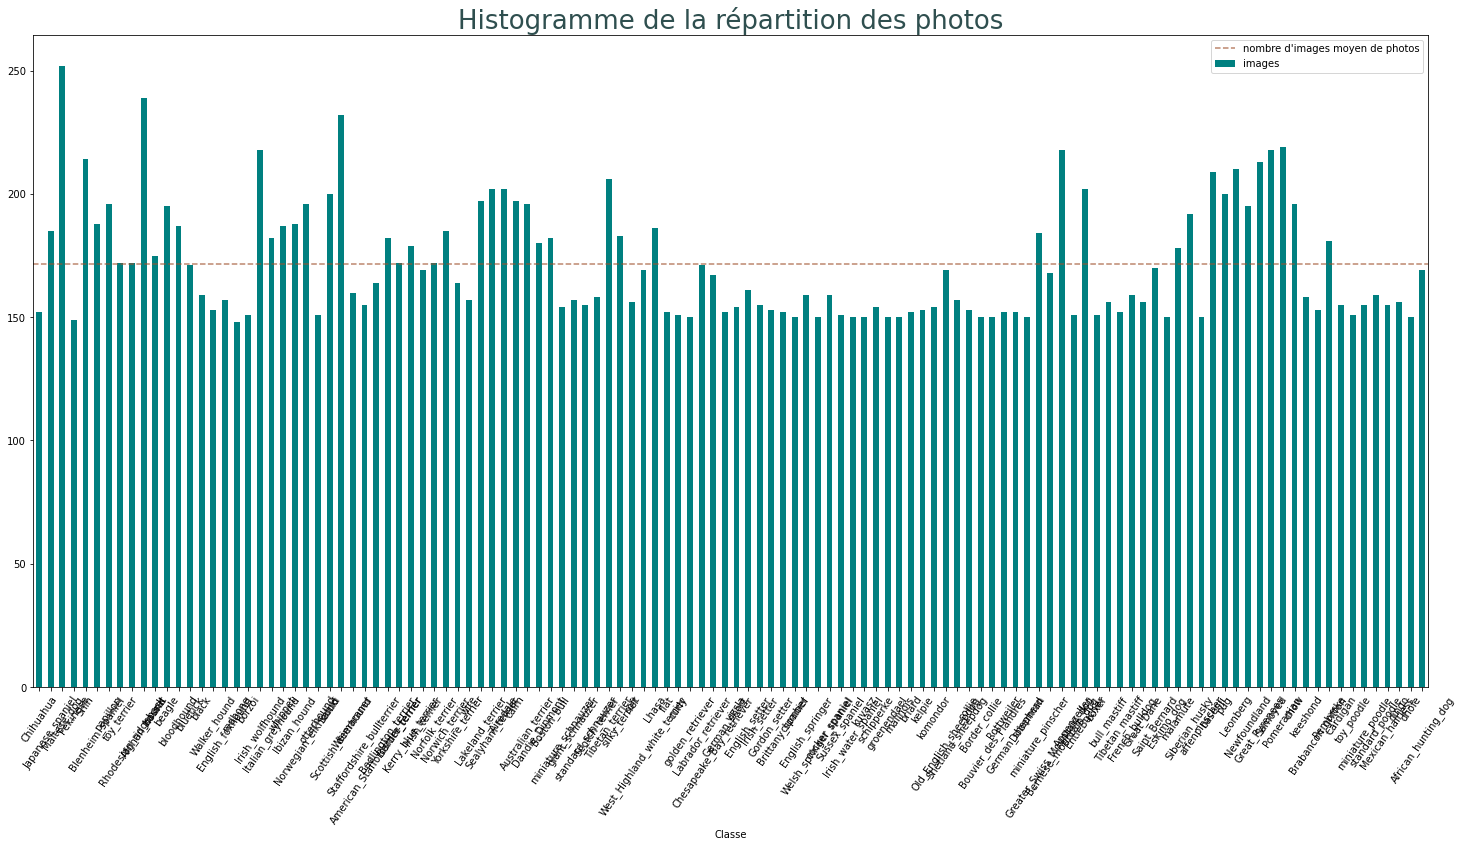

In [79]:
# Visualisation de la database entière


fig, ax = plt.subplots(1, 1, figsize=(25,12))

df.plot.bar(x = 'Classe', y = 'images', rot = 55,ax = ax,color = 'teal')

ax.axhline(df["images"].mean(),
           color='sienna', alpha=.7,
           linestyle='--',
           label="nombre d'images moyen de photos")

plt.title('Histogramme de la répartition des photos',color = 'darkslategray',fontsize = 26)
plt.legend()
plt.show()

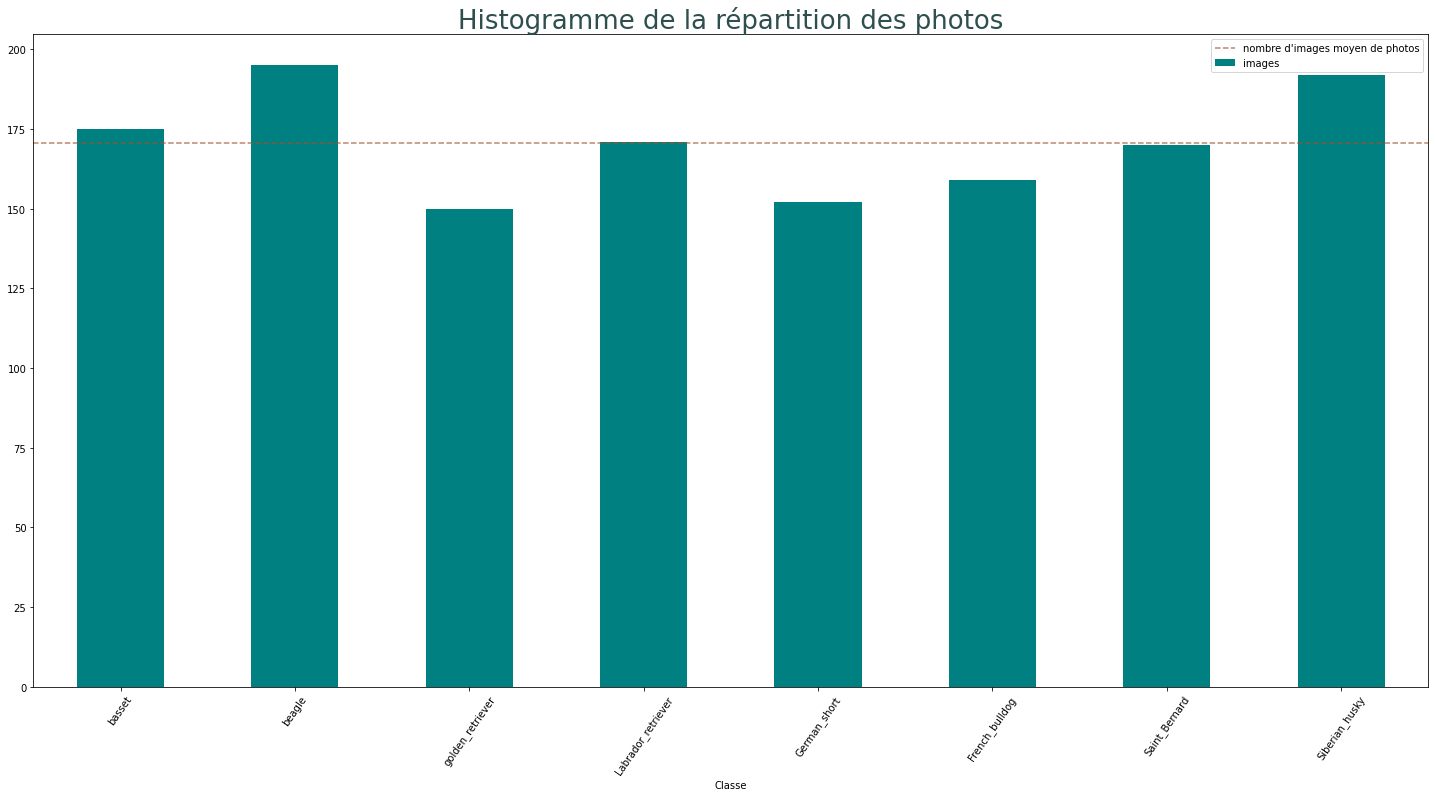

In [76]:
#Visualisation de la database retenue

fig, ax = plt.subplots(1, 1, figsize=(25,12))

df_r.plot.bar(x = 'Classe', y = 'images', rot = 55,ax = ax,color = 'teal')

ax.axhline(df_r["images"].mean(),
           color='sienna', alpha=.7,
           linestyle='--',
           label="nombre d'images moyen de photos")

plt.title('Histogramme de la répartition des photos',color = 'darkslategray',fontsize = 26)
plt.legend()
plt.show()

# Preprocessing des images

In [138]:
#Visualisation de quelques images

'''
show_samples(numsamples = 5,path_image = 'images/', r =5) :

show first numsamples images of the r-th class from the stanford dog dataset

args : 

int numsamples : number of samples to show
str path_image : path of dataset directory
int r : r-th class
'''





def show_samples(numsamples = 5,path_image = 'images/', r =5):
    fig = plt.figure(figsize=(20,20))

    images = os.listdir(path_image)

#     r = random.randint(0,len(images)-1)
    name_img = os.listdir(path_image + images[r])


    legende = images[r].split('-')[1]

    plt.suptitle(f'exemple de race {legende} :',fontsize = 15)

    
    for i in range(num_samples):
            img = mpimg.imread(path_image+images[r]+'/'+name_img[i])
            plt.subplot(num_samples, 5, i+1)
            plt.imshow(img)
            plt.axis('off')
    plt.show()

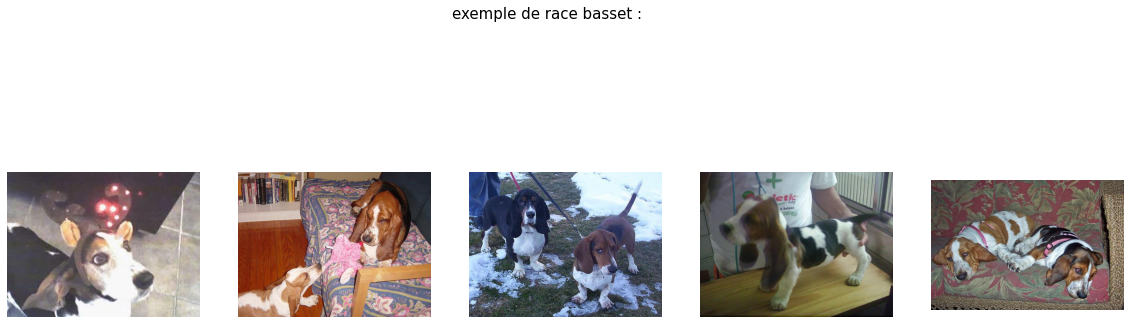

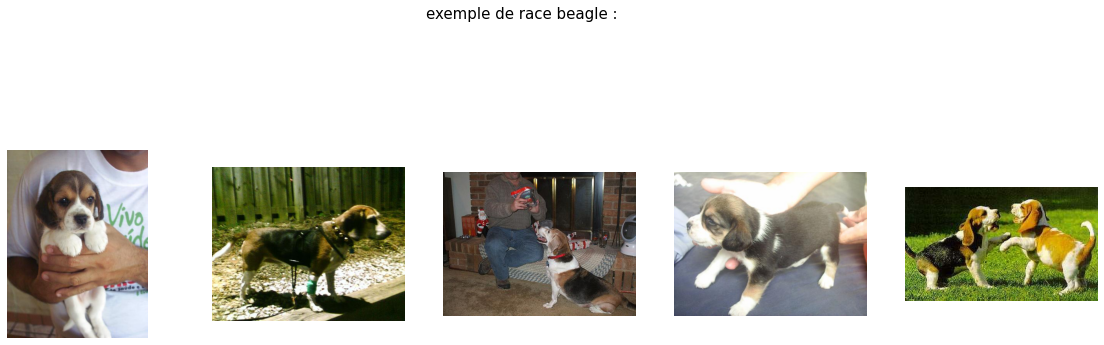

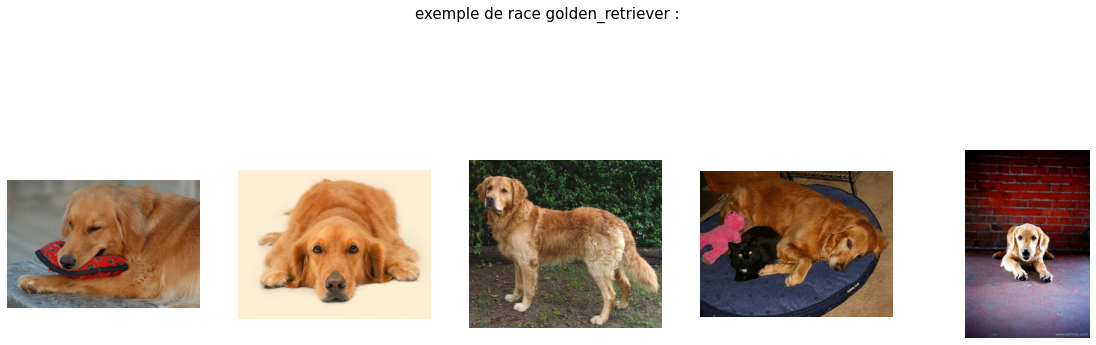

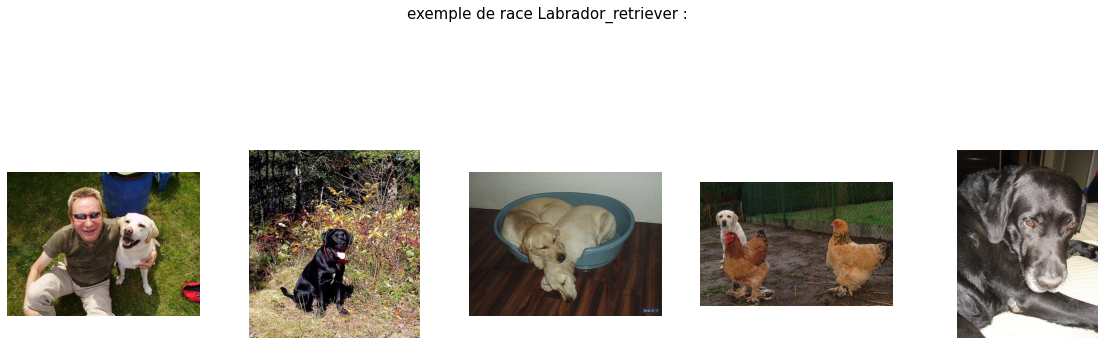

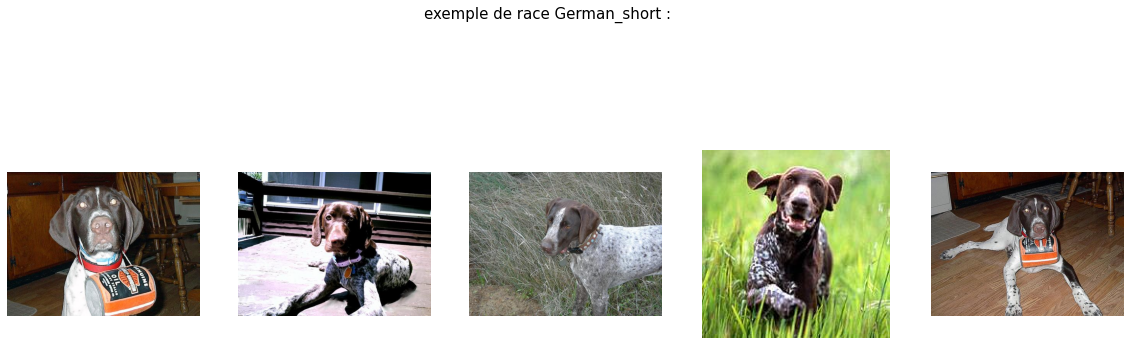

In [139]:
#show samples from the dataset

n_example = 5

for i in range(n_example):
    show_samples(r = i)
    print('\n')

In [267]:
#resize images with opencv

'''
resize_img : resize img with dimensions h and w

int h : height of the image
int width : width of the image
str path_img : path to the image
'''

def resize_img(img,h=224,w=224):
    return cv2.resize(img, (h,w), interpolation=cv2.INTER_LINEAR)

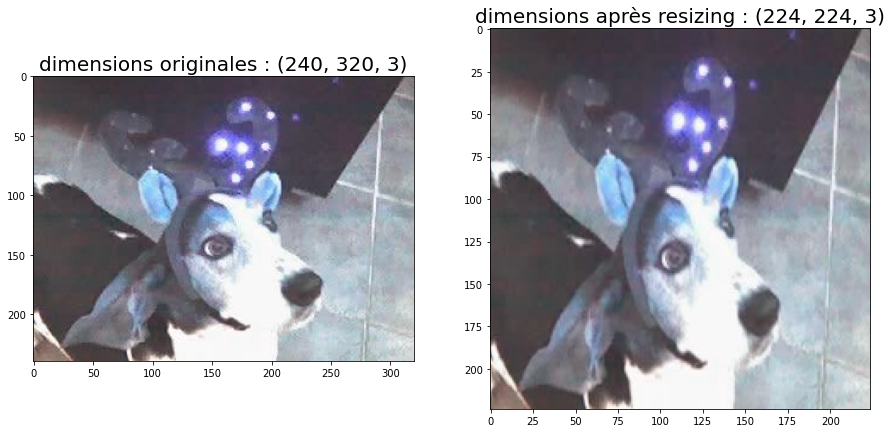

In [260]:
#show resized img

path_img_test = r'images/n02088238-basset/n02088238_10005.jpg'


img_test = cv2.imread(path_img_test)


img_test_resized = resize_img(path_img_test)

# display images

fig, ax = plt.subplots(ncols = 2 , figsize = (15,15))
ax[0].imshow(img_test)
ax[0].set_title(f'dimensions originales : {np.shape(img_test)}', fontsize = 20)
ax[1].imshow(img_test_resized)
ax[1].set_title(f'dimensions après resizing : {np.shape(img_test_resized)}',fontsize = 20)
plt.show()

# Egalisation d'histogramme

In [264]:
'''
hist_equalizer : performs histogram equalisation on RGB image

str path_img : path to the image
'''

def hist_equalizer(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    img_out = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2RGB)
    return img_out 



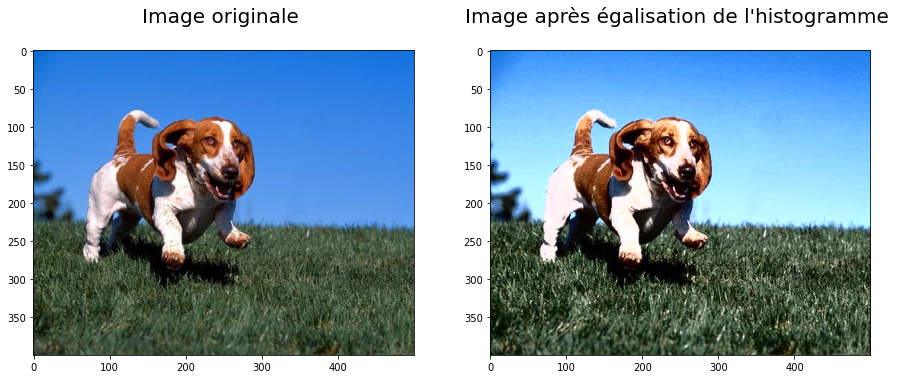

In [265]:
# Show histogram equalisation

path_img_test_2 = r'images/n02088238-basset/n02088238_490.jpg'

img_test = cv2.imread(path_img_test_2)
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
img_test_equalized = hist_equalizer(img_test)

fig, ax = plt.subplots(ncols = 2 , figsize = (15,15))
ax[0].imshow(img_test)
ax[0].set_title('Image originale \n', fontsize = 20)
ax[1].imshow(img_test_equalized)
ax[1].set_title('Image après égalisation de l\'histogramme \n',fontsize = 20)
plt.show()

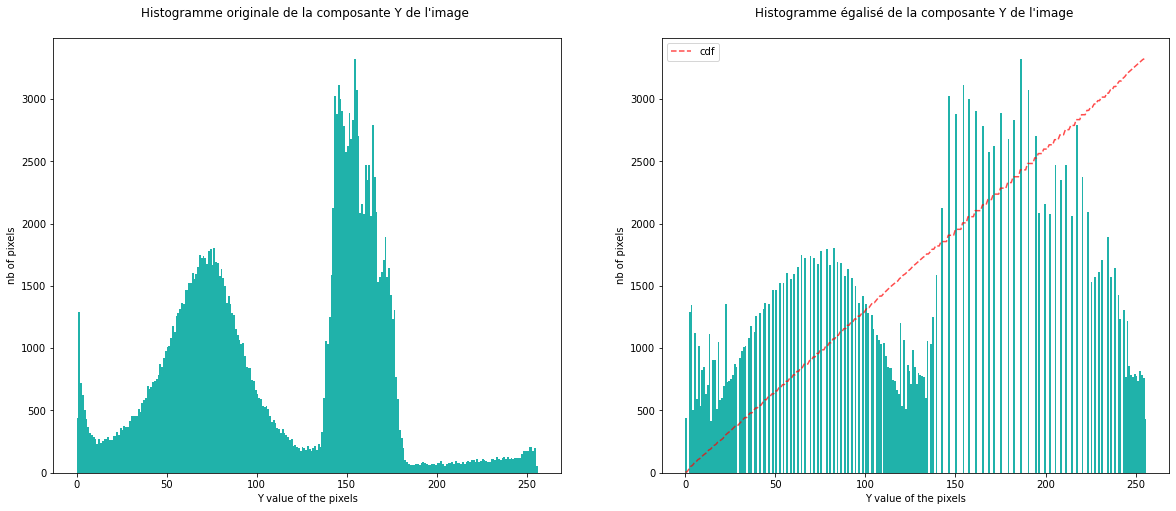

In [244]:
#Show histogram 

img_yuv = cv2.cvtColor(img_test, cv2.COLOR_BGR2YUV)
og_yuv = img_yuv[:,:,0]

eq_yuv = cv2.equalizeHist(og_yuv)


n,m = np.shape(og_yuv)

og_yuv_flat = np.reshape(og_yuv,(n*m))
eq_yuv_flat = np.reshape(eq_yuv,(n*m))




hist, bins = np.histogram(
                    eq_yuv_flat,
                    256, [0,256])

cdf = (np.cumsum(hist))
cdf_n_eq = cdf * float(hist.max()) / cdf.max()




fig, ax = plt.subplots(ncols = 2 , figsize = (20,8))
ax[0].hist(og_yuv_flat,bins = 256,color = 'lightseagreen',range = [0,256])

ax[0].set_title('Histogramme originale de la composante Y de l\'image \n',fontsize = 12)
ax[0].set_ylabel('nb of pixels')
ax[0].set_xlabel('Y value of the pixels')


ax[1].hist(eq_yuv_flat,bins = 256,color = 'lightseagreen',range = [0,256])
ax[1].set_title('Histogramme égalisé de la composante Y de l\'image \n',fontsize = 12)
ax[1].plot(cdf_n_eq, 
             color='r', alpha=.7,
             linestyle='--',label = 'cdf')
ax[1].set_ylabel('nb of pixels')
ax[1].set_xlabel('Y value of the pixels')
ax[1].legend()

plt.show()



# Filtrage

In [270]:
#filtrage gaussien

'''
gaussian filter : apply gaussian filter on RGB image

string path_img : path to the image

return : modified image
'''

def gaussian_filter(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    new_img = cv2.GaussianBlur(img,(3,3),0)
#     img_out = cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB)
    return new_img

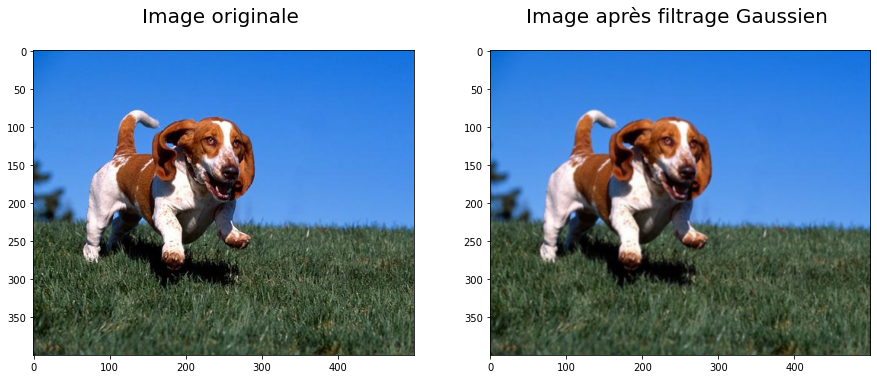

In [256]:
#show gaussian filter effect

path_img_test_2 = r'images/n02088238-basset/n02088238_490.jpg'

img_test = cv2.imread(path_img_test_2)
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
img_test_filtered = gaussian_filter(img_test)

fig, ax = plt.subplots(ncols = 2 , figsize = (15,15))
ax[0].imshow(img_test)
ax[0].set_title('Image originale \n', fontsize = 20)
ax[1].imshow(img_test_filtered)
ax[1].set_title('Image après filtrage Gaussien \n',fontsize = 20)
plt.show()

# Data augmentation

In [272]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

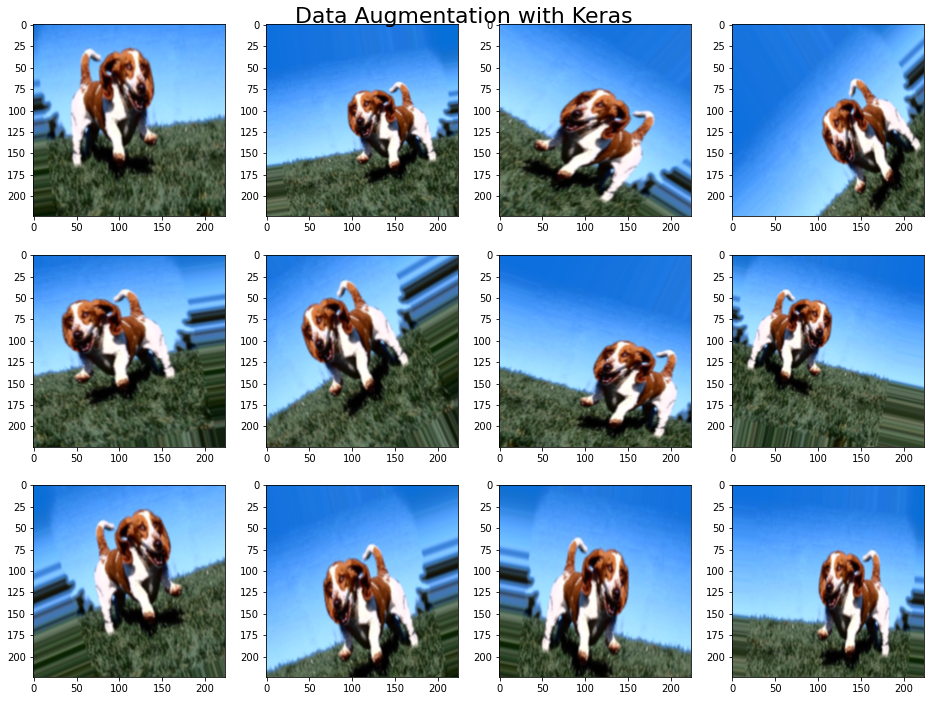

In [274]:
augmented_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Convert test img to array
x = cv2.imread(path_img_test_2)
x = resize_img(x)
x = hist_equalizer(x)
x = gaussian_filter(x)
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
i=0
fig = plt.figure(figsize=(16,12))
for batch in augmented_datagen.flow(x, batch_size=1):
    ax = fig.add_subplot(3,4,i+1)
    ax.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 12 == 0:
        break

plt.suptitle("Da",
             color="black", 
             fontsize=22, y=.90)
plt.show()